# Exploratory Data Analysis Checklist
1. Formulate your question
1. Read in your data
1. Check the packaging
1. Run `str()`
1. Look at the top and the bottom of your data
1. Check your “n”s
1. Validate with at least one external data source
1. Try the easy solution first
1. Challenge your solution
1. Follow up

# 1. Formulate your question

For this example, we will look at an air pollution dataset from  U.S. Environmental Protection Agency (EPA).  We ask
> "Which counties in the United States have the highest levels of ambient ozone pollution?"

We are also interested (always) in asking
>"Do I have the right data to answer my question?"

# 2. Read in your data

In [8]:
# use readr package for faster reading of large csv files, apparently it's faster than the built in csv reader when the csvs are not complex
library (readr)
ozone <- readr::read_csv('hourly_44201_2014.csv', col_types='ccccinnccccccncnnccccccc')


In [9]:
# a trick to remove spaces from the column names
names(ozone) <- make.names(names(ozone))
head(ozone)

State.Code,County.Code,Site.Num,Parameter.Code,POC,Latitude,Longitude,Datum,Parameter.Name,Date.Local,⋯,Units.of.Measure,MDL,Uncertainty,Qualifier,Method.Type,Method.Code,Method.Name,State.Name,County.Name,Date.of.Last.Change
<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
01,003,0010,44201,1,30.49748,-87.88026,NAD83,Ozone,2014-03-01,⋯,Parts per million,0.005,NA,NA,FEM,047,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30
01,003,0010,44201,1,30.49748,-87.88026,NAD83,Ozone,2014-03-01,⋯,Parts per million,0.005,NA,NA,FEM,047,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30
01,003,0010,44201,1,30.49748,-87.88026,NAD83,Ozone,2014-03-01,⋯,Parts per million,0.005,NA,NA,FEM,047,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30
01,003,0010,44201,1,30.49748,-87.88026,NAD83,Ozone,2014-03-01,⋯,Parts per million,0.005,NA,NA,FEM,047,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30
01,003,0010,44201,1,30.49748,-87.88026,NAD83,Ozone,2014-03-01,⋯,Parts per million,0.005,NA,NA,FEM,047,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30
01,003,0010,44201,1,30.49748,-87.88026,NAD83,Ozone,2014-03-01,⋯,Parts per million,0.005,NA,NA,FEM,047,INSTRUMENTAL - ULTRA VIOLET,Alabama,Baldwin,2014-06-30


# 3. Check The Packaging

Where you able to load your data?  DOes it look like what you expected?

In [10]:
nrow(ozone)
ncol(ozone)

[1] 9060694

[1] 24

# 4. Run `str()`

Check data types, sample values, look for issues

In [12]:
str(ozone)

spc_tbl_ [9,060,694 × 24] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ State.Code         : chr [1:9060694] "01" "01" "01" "01" ...
 $ County.Code        : chr [1:9060694] "003" "003" "003" "003" ...
 $ Site.Num           : chr [1:9060694] "0010" "0010" "0010" "0010" ...
 $ Parameter.Code     : chr [1:9060694] "44201" "44201" "44201" "44201" ...
 $ POC                : int [1:9060694] 1 1 1 1 1 1 1 1 1 1 ...
 $ Latitude           : num [1:9060694] 30.5 30.5 30.5 30.5 30.5 ...
 $ Longitude          : num [1:9060694] -87.9 -87.9 -87.9 -87.9 -87.9 ...
 $ Datum              : chr [1:9060694] "NAD83" "NAD83" "NAD83" "NAD83" ...
 $ Parameter.Name     : chr [1:9060694] "Ozone" "Ozone" "Ozone" "Ozone" ...
 $ Date.Local         : chr [1:9060694] "2014-03-01" "2014-03-01" "2014-03-01" "2014-03-01" ...
 $ Time.Local         : chr [1:9060694] "01:00" "02:00" "03:00" "04:00" ...
 $ Date.GMT           : chr [1:9060694] "2014-03-01" "2014-03-01" "2014-03-01" "2014-03-01" ...
 $ Time.GMT           : chr

# 5. Look at the top and bottom of your data

Make sure the `head()` and `tail()` rows of the data look right to increase confidence that it was parsed correctly

In [15]:
library(dplyr)

In [16]:
head(select(ozone, Latitude, Longitude, Date.Local))
tail(select(ozone, Latitude, Longitude, Date.Local))

Latitude,Longitude,Date.Local
<dbl>,<dbl>,<chr>
30.49748,-87.88026,2014-03-01
30.49748,-87.88026,2014-03-01
30.49748,-87.88026,2014-03-01
30.49748,-87.88026,2014-03-01
30.49748,-87.88026,2014-03-01
30.49748,-87.88026,2014-03-01


Latitude,Longitude,Date.Local
<dbl>,<dbl>,<chr>
31.7122,-106.3953,2014-08-31
31.7122,-106.3953,2014-08-31
31.7122,-106.3953,2014-08-31
31.7122,-106.3953,2014-08-31
31.7122,-106.3953,2014-08-31
31.7122,-106.3953,2014-08-31


# 6. Check your "n"s

If you have expect counts of things or observations based on what you know about what data SHOULD has been collected, check that.

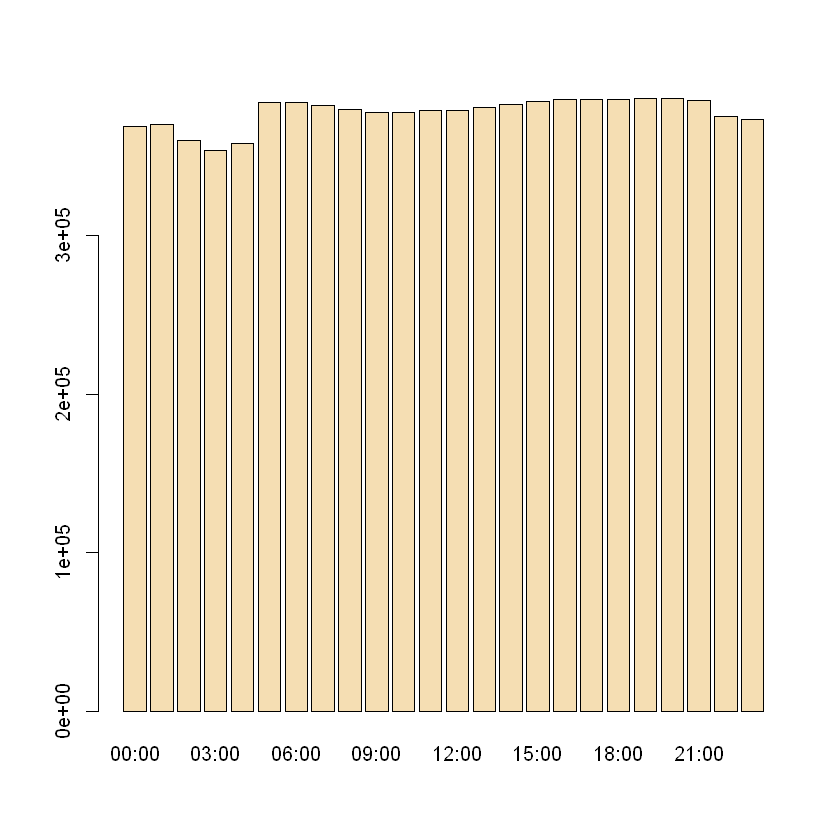

In [20]:
# Here, we have hourly ozone data that comes from monitors across the country.
# The monitors should be monitoring continuously during the day, so all hours should be represented
table(ozone$Time.Local) %>%
barplot(col = 'wheat')

In [27]:
# check same example where textbook found data issues on the older version of this dataset

filter(ozone,
       State.Code == '36'
       & County.Code == '033'
       & Date.Local == '2014-09-30'
       ) %>%
select(Date.Local, Time.Local, Sample.Measurement)

Date.Local,Time.Local,Sample.Measurement
<chr>,<chr>,<dbl>
2014-09-30,00:00,0.011
2014-09-30,01:00,0.012
2014-09-30,02:00,0.012
2014-09-30,03:00,0.011
2014-09-30,04:00,0.011
2014-09-30,05:00,0.011
2014-09-30,06:00,0.010
2014-09-30,07:00,0.010
2014-09-30,08:00,0.010


In [32]:
select(ozone, State.Name) %>%
unique() %>%
nrow()

[1] 53

In [34]:
unique(ozone$State.Name)

[1] "Alabama"              "Alaska"               "Arizona"             
 [4] "Arkansas"             "California"           "Colorado"            
 [7] "Connecticut"          "Delaware"             "District Of Columbia"
[10] "Florida"              "Georgia"              "Hawaii"              
[13] "Idaho"                "Illinois"             "Indiana"             
[16] "Iowa"                 "Kansas"               "Kentucky"            
[19] "Louisiana"            "Maine"                "Maryland"            
[22] "Massachusetts"        "Michigan"             "Minnesota"           
[25] "Mississippi"          "Missouri"             "Montana"             
[28] "Nebraska"             "Nevada"               "New Hampshire"       
[31] "New Jersey"           "New Mexico"           "New York"            
[34] "North Carolina"       "North Dakota"         "Ohio"                
[37] "Oklahoma"             "Oregon"               "Pennsylvania"        
[40] "Rhode Island"         "South Carolina"       "South Dakota"        
[43] "Tennessee"            "Texas"                "Utah"                
[46] "Vermont"              "Virginia"             "Washington"          
[49] "West Virginia"        "Wisconsin"            "Wyoming"             
[52] "Puerto Rico"          "Country Of Mexico"